Project 2 - Τεχνικές Εξόρυξης Δεδομένων - Παπαδόπουλος Χρήστος sdi2000165 - Ηλίας Γεωργίου sdi2000028

In [ ]:
#@title GoogleDrive mount(doesn't work)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Download Necessary libraries for q1
import nltk

!pip install emoji
!pip install pandas transformers torch
!pip install langdetect


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('cld2')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading cld2: Package 'cld2' not found in index


False

In [ ]:
#@title q1 trains reviews2019-2023/comments
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

import emoji

import torch

from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

from nltk import compat

def is_english(comment):
    try:
        lang = detect(comment)
        return lang == 'en'
    except LangDetectException:
        return False


def is_negative(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity < -0.3


newFileColumns=['id',
                'reviewer_name',
                'comments']


##READ FEBRUARY
febList = "../content/drive/MyDrive/AirBnb Data/2019/febrouary/reviews.csv"
df1 = pd.read_csv(febList,
                 on_bad_lines='error', usecols=newFileColumns)
df1 = df1.drop_duplicates(subset=['id'], keep='last')

##READ JUNE
juneList = "../content/drive/MyDrive/AirBnb Data/2023/june/reviews.csv"
df11 = pd.read_csv(juneList,
                 on_bad_lines='error', usecols=newFileColumns)
df11 = df11.drop_duplicates(subset=['id'], keep='last')

##READ MARCH
marchList = "../content/drive/MyDrive/AirBnb Data/2019/march/reviews.csv"
df2 = pd.read_csv(marchList,
                 on_bad_lines='error', usecols=newFileColumns)
df2 = df2.drop_duplicates(subset=['id'], keep='last')


marchList = "../content/drive/MyDrive/AirBnb Data/2023/march/reviews.csv"
df22 = pd.read_csv(marchList,
                 on_bad_lines='error', usecols=newFileColumns)
df22 = df22.drop_duplicates(subset=['id'], keep='last')

##READ APRIL
aprilList = "../content/drive/MyDrive/AirBnb Data/2019/april/reviews.csv"
df3 = pd.read_csv(aprilList,
                 on_bad_lines='error', usecols=newFileColumns)
df3 = df3.drop_duplicates(subset=['id'], keep='last')

##READ SEPTEMBER
septemberList = "../content/drive/MyDrive/AirBnb Data/2023/september/reviews.csv"
df33 = pd.read_csv(septemberList,
                 on_bad_lines='error', usecols=newFileColumns)
df33 = df33.drop_duplicates(subset=['id'], keep='last')

##MERGE FILES AND DROP DUPES(KEEP LAST ENTRY)
df2019 = pd.concat([df1, df2, df3])
df2019 = df2019.drop_duplicates(subset=['id'], keep='last')


df2023 = pd.concat([df11, df22, df33])
df2023 = df2023.drop_duplicates(subset=['id'], keep='last')

#Anything else empty can be ignored.
df2019=df2019.dropna()
#df2019=df2019.sample(n=10000)


df2023=df2023.dropna()
#df2023=df2023.sample(n=10000)

####### MAKE ALL CAPS TO LOWER
df2019['comments']=df2019['comments'].str.lower()
df2023['comments']=df2023['comments'].str.lower()

##### KEEP ONLY THE ASCII CHARACTERS
df2019=df2019[df2019['comments'].str.match('^[\x00-\x7F]+$', na=False)]
df2023=df2023[df2023['comments'].str.match('^[\x00-\x7F]+$', na=False)]


##### ELIMINATE EMOJIS AND PUNCTUATIONS
df2019.loc[:, 'comments']=df2019['comments'].str.replace(r'[.,:;=8][\-o\*\']?[)\]\(\[dDpP/:\}\{@\|\\]', ' ', regex=True)
df2023.loc[:, 'comments']=df2023['comments'].str.replace(r'[.,:;=8][\-o\*\']?[)\]\(\[dDpP/:\}\{@\|\\]', ' ', regex=True)


##### NOW ALL THE STOPWORDS
stop_words=set(stopwords.words('english'))


df2019.loc[:,'comments']=df2019['comments'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df2019[df2019['comments'].str.strip() != ' ']
df2019=df2019.dropna(subset='comments')


df2023.loc[:,'comments']=df2023['comments'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df2023[df2023['comments'].str.strip() != ' ']
df2023=df2023.dropna(subset='comments')


###### CHECK AFTER FOR ENGLISH TO SAVE TIME

df2019.to_csv(path_or_buf="../content/train_2019.csv", index=False)
df2023.to_csv(path_or_buf="../content/train_2023.csv", index=False)

In [ ]:
#@title q1 filter negative and neutral reviews and take a sample for the positive

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob


from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

from nltk import compat

def is_english(comment):
    if pd.isna(comment):  # Check if NaN
        return False
    try:
        comment = str(comment)  # make comment always to string first
        lang = detect(comment)
        return lang == 'en'
    except LangDetectException:
        return False

def is_negative_or_neutral(comment):
    if pd.isna(comment):  # Check if NaN
        return False
    comment = str(comment)  # make comment always to string first
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity < 0

def is_negative(comment):
    if pd.isna(comment):  # Check if NaN
        return False
    comment = str(comment)  # make comment always to string first
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity < -0.25

def is_neutral(comment):
    if pd.isna(comment):  # Check if NaN
        return False
    comment = str(comment)  # make comment always to string first
    analysis = TextBlob(comment)
    score=analysis.sentiment.polarity
    return  score >= -0.25 and score < 0


newFileColumns=['id',
                'reviewer_name',
                'comments']


list2019 = "../content/train_2019.csv"
df2019 = pd.read_csv(list2019, on_bad_lines='error', usecols=newFileColumns)
#df2019=df2019.sample(10000)

list2023 = "../content/train_2023.csv"
df2023 = pd.read_csv(list2023, on_bad_lines='error', usecols=newFileColumns)
#df2023=df2023.sample(10000)

neg_and_neu2019=df2019[df2019['comments'].apply(is_negative_or_neutral)]

negative2019 = neg_and_neu2019[neg_and_neu2019['comments'].apply(is_negative)]
neutral2019 = neg_and_neu2019[neg_and_neu2019['comments'].apply(is_neutral)]

#Kepp only the Enlgish comments to avoid detecting mostly the german words as bad comments
mask = negative2019['comments'].apply(is_english)
negative2019 = negative2019[mask]

mask = neutral2019['comments'].apply(is_english)
neutral_comments_df = neutral2019[mask]


negative2019.to_csv(path_or_buf="../content/negtest19.csv")
neutral2019.to_csv(path_or_buf="../content/neutest19.csv")

############################ 173 negatives and 1577 neutrals

neg_and_neu2023=df2023[df2023['comments'].apply(is_negative_or_neutral)]

negative2023 = neg_and_neu2023[neg_and_neu2023['comments'].apply(is_negative)]
neutral2023 = neg_and_neu2023[neg_and_neu2023['comments'].apply(is_neutral)]

mask = negative2023['comments'].apply(is_english)
negative2023 = negative2023[mask]

mask = neutral2023['comments'].apply(is_english)
neutral2023 = neutral2023[mask]

negative2023.to_csv(path_or_buf="../content/negtest23.csv")
neutral2023.to_csv(path_or_buf="../content/neutest23.csv")

############################ 357 negatives and 2526 neutrals fro 2019

######## Remove already filtered negs and nues from our df
removable = pd.concat([negative2019['id'], neutral2019['id']])
df2019 = df2019[~df2019['id'].isin(removable)]

removable = pd.concat([negative2023['id'], neutral2023['id']])
df2023 = df2023[~df2023['id'].isin(removable)]

####### take our positives to be 2x the negatives
df2019=df2019.sample(346)
mask = df2019['comments'].apply(is_english)
df201 = df2019[mask]

df2023=df2023.sample(714)
mask = df2023['comments'].apply(is_english)
df2023 = df2023[mask]


###### take the neutrals 1.5x the negatives
neutral2019=neutral2019.sample(260)
neutral2023=neutral2023.sample(536)


final2019=pd.concat([df2019, negative2019, neutral2019])
final2023=pd.concat([df2023, negative2023, neutral2023])

final2019.to_csv(path_or_buf="../content/final19.csv")
final2023.to_csv(path_or_buf="../content/final23.csv")



In [ ]:
#@title q1 2019 analysis  takes about 11 minutes
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import emoji

from transformers import  pipeline
import torch


list2019 = "../content/final19.csv"

df2019=pd.read_csv(list2019, on_bad_lines='error')
#df2019=df2019.sample(500)
#sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english", truncation=True, batch_size=8)
#df2019['sentiment'] = df2019['comments'].apply(lambda comment:sentiment_analysis(comment)[0]['label'])

df2019['comments'] = df2019['comments'].astype(str)

sentiment_analysis = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", truncation=True)
df2019['sentiment'] = df2019['comments'].apply(lambda comment:sentiment_analysis(comment)[0]['label'])

new_df=df2019[['id', 'comments', 'sentiment']]


new_df.to_csv(path_or_buf="../content/analysis2019.csv", index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

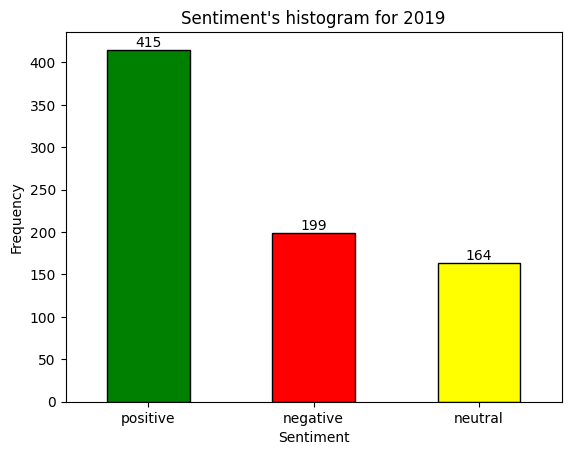

In [ ]:
#@title q1 2019 plot
import pandas as pd
import matplotlib.pyplot as plt

mylist="../content/drive/MyDrive/analysis2019.csv"
df=pd.read_csv(mylist, on_bad_lines='error')

sentiment_counts = df['sentiment'].value_counts()

#plt.figure(figsize=(8, 6))
plot=sentiment_counts.plot(kind='bar', color=['green', 'red', 'yellow'], edgecolor='black')

for container in plot.containers:
    plot.bar_label(container, label_type='edge')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment\'s histogram for 2019')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#@title q1 2023 analysis
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import emoji

from transformers import  pipeline
import torch


list2023 = "../content/final23.csv"

df2023=pd.read_csv(list2023, on_bad_lines='error')

#sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english", truncation=True, batch_size=8)
#df2019['sentiment'] = df2019['comments'].apply(lambda comment:sentiment_analysis(comment)[0]['label'])

df2019['comments'] = df2019['comments'].astype(str)

sentiment_analysis = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", truncation=True)
df2023['sentiment'] = df2023['comments'].apply(lambda comment:sentiment_analysis(comment)[0]['label'])

new_df=df2023[['id', 'comments', 'sentiment']]

new_df.to_csv(path_or_buf="../content/drive/MyDrive/analysis2023.csv", index=False)

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


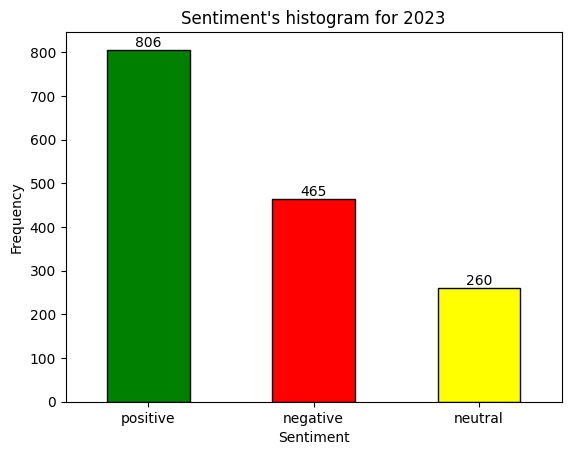

In [ ]:
#@title q1 2023 plot
import pandas as pd
import matplotlib.pyplot as plt

mylist="../content/drive/MyDrive/analysis2023.csv"
df=pd.read_csv(mylist, on_bad_lines='error')

sentiment_counts = df['sentiment'].value_counts()

#plt.figure(figsize=(8, 6))
plot=sentiment_counts.plot(kind='bar', color=['green', 'red', 'yellow'], edgecolor='black')

for container in plot.containers:
    plot.bar_label(container, label_type='edge')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment\'s histogram for 2023')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#@title Q2 pickle
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#nltk.download('all') #once

# Load data
analysisPath = "../content/drive/MyDrive/analysis2019.csv"
df2019 = pd.read_csv(analysisPath)  # id, comments, sentiment

# Split data into training and test sets
df2019_training = df2019.sample(frac=0.8, random_state=10)
df2019_test = df2019.drop(df2019_training.index)
df2019_test.to_csv(path_or_buf='../content/2019test.csv')

# TFIDF
df2019_training['comments'] = df2019_training['comments'].astype(str)
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(df2019_training['comments'])

def get_TFIDF_vector(text):
    vector = vectorizer.transform([text]).toarray()[0]
    return vector

df2019_training['tfidf'] = df2019_training['comments'].apply(get_TFIDF_vector)
df2019_training['tfidf_sum'] = df2019_training['tfidf'].apply(lambda x: np.mean(x))

# WORD EMBEDDINGS
df2019_training['tokenized_review'] = df2019_training['comments'].apply(word_tokenize)
model = Word2Vec(sentences=df2019_training['tokenized_review'], vector_size=200, window=5, min_count=1, workers=2)

def get_review_embedding(tokens, model):
    valid_tokens = [token for token in tokens if token in model.wv.key_to_index]
    if not valid_tokens:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

df2019_training['review_embedding'] = df2019_training['tokenized_review'].apply(lambda tokens: get_review_embedding(tokens, model))

kf = KFold(n_splits=10, random_state=42, shuffle=True)
y_train = df2019_training['sentiment']

best_svm_model = None
best_svm_metrics = (-1, -1, -1, -1)  # accuracy, precision, recall, f1
best_svm_tfidf_model = None
best_svm_tfidf_metrics = (-1, -1, -1, -1)
best_knn_model = None
best_knn_metrics = (-1, -1, -1, -1)
best_knn_tfidf_model = None
best_knn_tfidf_metrics = (-1, -1, -1, -1)
best_rf_model = None
best_rf_metrics = (-1, -1, -1, -1)
best_rf_tfidf_model = None
best_rf_tfidf_metrics = (-1, -1, -1, -1)



for i, (train_index, test_index) in enumerate(kf.split(df2019_training)):
    X_train_fold, X_val_fold = df2019_training.iloc[train_index], df2019_training.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # SVM
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(X_train_fold['review_embedding'].tolist(), y_train_fold)
    y_pred = svm_model.predict(X_val_fold['review_embedding'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_svm_metrics[0]:
        best_svm_metrics = (accuracy, precision, recall, f1)
        best_svm_model = svm_model

    # SVM-TFIDF
    svm_model_tfidf = svm.SVC(kernel='linear')
    svm_model_tfidf.fit(X_train_fold['tfidf'].tolist(), y_train_fold)
    y_pred = svm_model_tfidf.predict(X_val_fold['tfidf'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_svm_tfidf_metrics[0]:
        best_svm_tfidf_metrics = (accuracy, precision, recall, f1)
        best_svm_tfidf_model = svm_model_tfidf

    # KNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_fold['review_embedding'].tolist(), y_train_fold)
    y_pred = knn_model.predict(X_val_fold['review_embedding'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_knn_metrics[0]:
        best_knn_metrics = (accuracy, precision, recall, f1)
        best_knn_model = knn_model

    # KNN-TFIDF
    knn_tfidf_model = KNeighborsClassifier(n_neighbors=5)
    knn_tfidf_model.fit(X_train_fold['tfidf'].tolist(), y_train_fold)
    y_pred = knn_tfidf_model.predict(X_val_fold['tfidf'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_knn_tfidf_metrics[0]:
        best_knn_tfidf_metrics = (accuracy, precision, recall, f1)
        best_knn_tfidf_model = knn_tfidf_model

    # RF
    rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
    rf_model.fit(X_train_fold['review_embedding'].tolist(), y_train_fold)
    y_pred = rf_model.predict(X_val_fold['review_embedding'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_rf_metrics[0]:
        best_rf_metrics = (accuracy, precision, recall, f1)
        best_rf_model = rf_model

    # RF-TFIDF
    rf_tfidf_model = RandomForestClassifier(n_estimators=100, random_state=10)
    rf_tfidf_model.fit(X_train_fold['tfidf'].tolist(), y_train_fold)
    y_pred = rf_tfidf_model.predict(X_val_fold['tfidf'].tolist())
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    if accuracy > best_rf_tfidf_metrics[0]:
        best_rf_tfidf_metrics = (accuracy, precision, recall, f1)
        best_rf_tfidf_model = rf_tfidf_model

#Train best models on the entire set
X_train_embeddings = df2019_training['review_embedding'].tolist()
X_train_tfidf = df2019_training['tfidf'].tolist()

best_svm_model.fit(X_train_embeddings, y_train)
best_svm_tfidf_model.fit(X_train_tfidf, y_train)
best_knn_model.fit(X_train_embeddings, y_train)
best_knn_tfidf_model.fit(X_train_tfidf, y_train)
best_rf_model.fit(X_train_embeddings, y_train)
best_rf_tfidf_model.fit(X_train_tfidf, y_train)

print("Model + accuracy, precision, recall, f1")
print("best_svm_model", best_svm_metrics)
print("best_svm_tfidf_model", best_svm_tfidf_metrics)
print("best_knn_model", best_knn_metrics)
print("best_knn_tfidf_model",best_knn_tfidf_metrics)
print("best_rf_model", best_rf_metrics)
print("best_rf_tfidf_model", best_rf_tfidf_metrics)

# Save the best models to pickle files
with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

with open('best_svm_tfidf_model.pkl', 'wb') as file:
    pickle.dump(best_svm_tfidf_model, file)

with open('best_knn_model.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)

with open('best_knn_tfidf_model.pkl', 'wb') as file:
    pickle.dump(best_knn_tfidf_model, file)

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

with open('best_rf_tfidf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_tfidf_model, file)


Model + accuracy, precision, recall, f1
best_svm_model (0.6451612903225806, 0.7710718002081165, 0.6451612903225806, 0.5060088551549652)
best_svm_tfidf_model (0.8548387096774194, 0.8590677446036447, 0.8548387096774194, 0.8541521202811525)
best_knn_model (0.5161290322580645, 0.5343959890265821, 0.5161290322580645, 0.5180676529376577)
best_knn_tfidf_model (0.6129032258064516, 0.7474287050023375, 0.6129032258064516, 0.6382177528187715)
best_rf_model (0.6451612903225806, 0.6034946236559139, 0.6451612903225806, 0.6131665198877821)
best_rf_tfidf_model (0.8387096774193549, 0.8402073732718894, 0.8387096774193549, 0.8360348793666078)


In [ ]:
#@title Q2, predictions
import pandas as pd
import numpy as np
import pickle
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

df2019_test = pd.read_csv('2019test.csv')

#Prepare test data as we prepared training data.
# TFIDF
df2019_test['comments'] = df2019_test['comments'].astype(str)
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(df2019_training['comments'])

def get_TFIDF_vector(text):
    vector = vectorizer.transform([text]).toarray()[0]
    return vector

df2019_test['tfidf'] = df2019_test['comments'].apply(get_TFIDF_vector)
df2019_test['tfidf_sum'] = df2019_test['tfidf'].apply(lambda x: np.mean(x))

# WORD EMBEDDINGS
df2019_test['tokenized_review'] = df2019_test['comments'].apply(word_tokenize)
model = Word2Vec(sentences=df2019_test['tokenized_review'], vector_size=200, window=5, min_count=1, workers=2)

def get_review_embedding(tokens, model):
    valid_tokens = [token for token in tokens if token in model.wv.key_to_index]
    if not valid_tokens:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

df2019_test['review_embedding'] = df2019_test['tokenized_review'].apply(lambda tokens: get_review_embedding(tokens, model))

# Convert data for predictions
X_test = df2019_test['review_embedding'].tolist()
X_test_tfidf = df2019_test['tfidf'].tolist()

# Load and use the best models for predictions
# SVM
with open('best_svm_model.pkl', 'rb') as file:
    best_svm_model = pickle.load(file)
y_pred_test = best_svm_model.predict(X_test)
df2019_test['svm_embeddings_predicted_sentiment'] = y_pred_test

with open('best_svm_tfidf_model.pkl', 'rb') as file:
    best_svm_tfidf_model = pickle.load(file)
y_pred_test = best_svm_tfidf_model.predict(X_test_tfidf)
df2019_test['svm_tfidf_predicted_sentiment'] = y_pred_test

# KNN
with open('best_knn_model.pkl', 'rb') as file:
    best_knn_model = pickle.load(file)
y_pred_test = best_knn_model.predict(X_test)
df2019_test['knn_embeddings_predicted_sentiment'] = y_pred_test

with open('best_knn_tfidf_model.pkl', 'rb') as file:
    best_knn_tfidf_model = pickle.load(file)
y_pred_test = best_knn_tfidf_model.predict(X_test_tfidf)
df2019_test['knn_tfidf_predicted_sentiment'] = y_pred_test

# RF
with open('best_rf_model.pkl', 'rb') as file:
    best_rf_model = pickle.load(file)
y_pred_test = best_rf_model.predict(X_test)
df2019_test['rf_embeddings_predicted_sentiment'] = y_pred_test

with open('best_rf_tfidf_model.pkl', 'rb') as file:
    best_rf_tfidf_model = pickle.load(file)
y_pred_test = best_rf_tfidf_model.predict(X_test_tfidf)
df2019_test['rf_tfidf_predicted_sentiment'] = y_pred_test

q2_sentiments=df2019['sentiment'].value_counts()

######
print(q2_sentiments)
print(df2019_test)
df2019_test.to_csv(path_or_buf='../content/predictions.csv')

sentiment
positive    415
negative    199
neutral     164
Name: count, dtype: int64
     Unnamed: 0         id                                           comments  \
0             4  177261306  great place, best far used. brand new everythi...   
1             8  197824334             nice appartement nice just! thanks dim   
2            13  333437641  excellent location! short walk giant ferris wh...   
3            15   88049685  demie great hostess. flexible everything could...   
4            40  175990438  really nice comfortable apartment excellent ac...   
..          ...        ...                                                ...   
151         757  343073243  brand-new flat, well equipped. 15'away acropol...   
152         763   85036620  big apartment 5-6 people really bad neighbourh...   
153         767  281570826  yannis responsive extremely accommodating stay...   
154         770  158266089  really close everything. trouble finding place...   
155         772  29211459

In [ ]:
#@title Q3
import pandas as pd
import pickle
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from collections import Counter
from scipy.spatial.distance import cosine
import math


analysisPath = "../content/drive/MyDrive/analysis2019.csv"
df2019 = pd.read_csv(analysisPath) # id, comments, sentiment
df2019_training = df2019.sample(frac=0.8, random_state=10)
comments = df2019_training['comments'].dropna().tolist()



processed_comments = [simple_preprocess(comment) for comment in comments]
all_words = [word for comment in processed_comments for word in comment]

word_counts = Counter(all_words)
#take the 300 most used words and create a dictionary
most_common_words = [word for word, _ in word_counts.most_common(300)]
word_dict = {word: i for i, word in enumerate(most_common_words)}

word_df=pd.DataFrame.from_dict(word_dict, orient='index')
word_df.to_csv("../content/most_common_words.csv")

##WORD EMBEDDINGS
processed_comments = [simple_preprocess(comment) for comment in comments]
word2vec_model = Word2Vec(sentences=processed_comments, vector_size=100, window=5, min_count=1, workers=2)

print("Give me a moment please!")

##COSINE SIMILARITY
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

similarity_matrix = np.zeros((300, 300))

for i, word1 in enumerate(most_common_words):
    for j, word2 in enumerate(most_common_words):
        if i != j:
            vec1 = word2vec_model.wv[word1]
            vec2 = word2vec_model.wv[word2]
            similarity_matrix[i, j] = cosine_similarity(vec1, vec2)
        else:
            similarity_matrix[i, j] = 1.0


#Create the similarity matrix and store it in a pickle file
similarity_df = pd.DataFrame(similarity_matrix, index=most_common_words, columns=most_common_words)

with open("similarity_matrix.pkl", "wb") as similarity_file:
    pickle.dump(similarity_df, similarity_file)

##################################################################################



def semantic_neighborhood(word, model, topn=10):
    if word in model.wv.key_to_index:
        return model.wv.most_similar(word, topn=topn)
    else:
        ##CREATE RANDOM VECTOR {-1,1} VALUES AND A NEW NEIGHBOURHOOD
        print(f"'{word1}' is not in the dictionary, we will generate random values \{-1,1} for our vector.")
        new_vec=np.random.uniform(-1, 1, 100)
        return [(common_word, cosine_similarity(new_vec, word2vec_model.wv[common_word])) for common_word in most_common_words[:topn]]


def max_similarity(neighbors1, neighbors2):
    max_sim = 0
    for word1, sim1 in neighbors1:
        for word2, sim2 in neighbors2:
            sim = cosine_similarity(word2vec_model.wv[word1], word2vec_model.wv[word2])
            if sim > max_sim:
                max_sim = sim
    return max_sim


def correlation_similarity(neighbors1, neighbors2):
    common_neighbors = set([word for word, _ in neighbors1]).intersection(set([word for word, _ in neighbors2]))
    similarities1 = [sim for word, sim in neighbors1 if word in common_neighbors]
    similarities2 = [sim for word, sim in neighbors2 if word in common_neighbors]
    if len(similarities1) > 0 and len(similarities2) > 0:
        if len(similarities1) == 1:
            return 1.0 if similarities1[0] == similarities2[0] else 0.0
        correlation = np.corrcoef(similarities1, similarities2)[0, 1]
        return correlation
    else:
        return 0

def sum_of_squares_similarity(neighbors1, neighbors2):
    common_neighbors = set([word for word, _ in neighbors1]).intersection(set([word for word, _ in neighbors2]))
    similarities1 = [sim for word, sim in neighbors1 if word in common_neighbors]
    similarities2 = [sim for word, sim in neighbors2 if word in common_neighbors]
    if len(similarities1) > 0 and len(similarities2) > 0:
        sum_of_squares = sum([(sim1 ** 2) * (sim2 ** 2) for sim1, sim2 in zip(similarities1, similarities2)]) / len(similarities1)
        return sum_of_squares
    else:
        return 0



#def sum_of_squares_similarity(neighbors1, neighbors2):
 #   similarities1 = [sim for word, sim in neighbors1]
  #  similarities2 = [sim for word, sim in neighbors2]
   # if len(similarities1) > 0 and len(similarities2) > 0:
    #    sum_of_squares = math.sqrt(sum([(sim1 ** 2) + (sim2 ** 2) for sim1, sim2 in zip(similarities1, similarities2)]))
     #   return sum_of_squares
    #else:
     #   return 0


#our default N=5
print("Give two words")
word1 = input("Give a word from the 300 most used of our lexical.")
word2 = input("Give a second word from the 300 most used of our lexical.")
#change N here*********
N = 5

if word1 not in word2vec_model.wv.key_to_index:
  print(f"'{word1}' is not in the dictionary, we will generate random values from -1 to 1 for our vector.")
  new_vec1=np.random.uniform(-1, 1, 100)

if word2 not in word2vec_model.wv.key_to_index:
  print(f"'{word2}' is not in the dictionary, we will generate random values from -1 to 1  for our vector.")
  new_vec2=np.random.uniform(-1, 1, 100)


#########IF WORDS DOESNT EXIST WE CHECK INSIDE SEMANTIC NEIGBOURHOOD



################## KANOUME ENA LOOP GIA NA DEIKSOUME TIS DIAFORES ANALOGA TO N
loop_values=[1,5,10,15,20,30,50]
similarities=[]

for N in loop_values:
  neighborhood1 = semantic_neighborhood(word1, word2vec_model, topn=N)
  neighborhood2 = semantic_neighborhood(word2, word2vec_model, topn=N)

  print("Our N is:", N)

  print(f"Semantic neighborhood for '{word1}': {neighborhood1}")
  print(f"Semantic neighborhood for '{word2}': {neighborhood2}")

  similarity_a = max_similarity(neighborhood1, neighborhood2)
  similarity_b = correlation_similarity(neighborhood1, neighborhood2)
  similarity_c = sum_of_squares_similarity(neighborhood1, neighborhood2)


  print(f"Similarity (Method a - Maximum similarity): {similarity_a}")
  print(f"Similarity (Method b - Correlation similarity): {similarity_b}")
  print(f"Similarity (Method c - Sum of squared similarities): {similarity_c}\n\n")
  similarities.append((N, similarity_a, similarity_b, similarity_c))

df_similarities=pd.DataFrame(similarities, columns=['N', 'Maximum', 'Correlation', 'Sum of Squares'])
df_similarities.to_csv('../content/RESULTS_Q3.csv')
print(df_similarities)

print("\n\n")

print('Βλέπουμε ότι όσο μεγαλώενι το Ν, μεγαλώνει και το max similarity μας(εκτός αν έχουμε ήδη πιάσει το μέγιστο 1). \n \
κάτι τέτοιο δεν ισχύει στις άλλες δύο similarities. Αυτό συμβαίνει γιατί το max similarity παίρνει μόνο την καλύτερη ομοιότητα \n \
ενώ για παράδειγμα στο correlation similarity με την αύξηση του Ν προστίθονται στο neighborhood μας γείτονες με μικρότερη ή και αρνητική \n \
συσχέτιση με αποτέλεσμα να μείωνεται η συνολική τιμή μας. Όμοια στο sum of squares similarity η συμβολή των γειτόνων με λιγότερη συνάφεια \n \
στο τελικό άθροισμα είναι ελλιπής και οδηγεί σε μείωση της συνολικής τιμής. Ωστόσο ορισμένες φορές μπορεί και αν αυξάνεται αν οι γείτονες \n \
έχουν αρκετή συνάφεια.')

print("\n")
#Now present 3 Neighborhoods for N=5

print("Our N=5\n")

#Neighborhood 1 with the 2 most common words
print("We will use the words 'apartment', 'place' cause they are the most common.")
neighborhood1 = semantic_neighborhood('apartment', word2vec_model, 5)
neighborhood2 = semantic_neighborhood('place', word2vec_model, 5)

print(f"Semantic neighborhood for 'apartment': {neighborhood1}")
print(f"Semantic neighborhood for 'place': {neighborhood2}")

similarity_a = max_similarity(neighborhood1, neighborhood2)
similarity_b = correlation_similarity(neighborhood1, neighborhood2)
similarity_c = sum_of_squares_similarity(neighborhood1, neighborhood2)


print(f"Similarity (Method a - Maximum similarity): {similarity_a}")
print(f"Similarity (Method b - Correlation similarity): {similarity_b}")
print(f"Similarity (Method c - Sum of squared similarities): {similarity_c}\n\n")



#Neighborhood 2 with the 2 random words
print("We will use the words 'cold', 'totally' as two randomly selected words.")
neighborhood1 = semantic_neighborhood('cold', word2vec_model, 5)
neighborhood2 = semantic_neighborhood('totally', word2vec_model, 5)

print(f"Semantic neighborhood for 'cold': {neighborhood1}")
print(f"Semantic neighborhood for 'totally': {neighborhood2}")

similarity_a = max_similarity(neighborhood1, neighborhood2)
similarity_b = correlation_similarity(neighborhood1, neighborhood2)
similarity_c = sum_of_squares_similarity(neighborhood1, neighborhood2)


print(f"Similarity (Method a - Maximum similarity): {similarity_a}")
print(f"Similarity (Method b - Correlation similarity): {similarity_b}")
print(f"Similarity (Method c - Sum of squared similarities): {similarity_c}\n\n")



#Neighborhood 3 with the 1 word tjat doesnt exist in our dictionary
print("We will use the words 'shops', 'shopping' cause the second one doesnt exist in our dictionary.")
neighborhood1 = semantic_neighborhood('shops', word2vec_model, 5)
neighborhood2 = semantic_neighborhood('shopping', word2vec_model, 5)

print(f"Semantic neighborhood for 'shops': {neighborhood1}")
print(f"Semantic neighborhood for 'shopping': {neighborhood2}")

similarity_a = max_similarity(neighborhood1, neighborhood2)
similarity_b = correlation_similarity(neighborhood1, neighborhood2)
similarity_c = sum_of_squares_similarity(neighborhood1, neighborhood2)


print(f"Similarity (Method a - Maximum similarity): {similarity_a}")
print(f"Similarity (Method b - Correlation similarity): {similarity_b}")
print(f"Similarity (Method c - Sum of squared similarities): {similarity_c}\n\n")

Give me a moment please!
Give two words
Give a word from the 300 most used of our lexical.cold
Give a second word from the 300 most used of our lexical.winter
Our N is: 1
Semantic neighborhood for 'cold': [('like', 0.9747130274772644)]
Semantic neighborhood for 'winter': [('even', 0.825287938117981)]
Similarity (Method a - Maximum similarity): 0.9832078814506531
Similarity (Method b - Correlation similarity): 0
Similarity (Method c - Sum of squared similarities): 0


Our N is: 5
Semantic neighborhood for 'cold': [('like', 0.9747130274772644), ('also', 0.9735433459281921), ('apartment', 0.9722913503646851), ('flat', 0.9722106456756592), ('night', 0.9718295931816101)]
Semantic neighborhood for 'winter': [('even', 0.825287938117981), ('waiting', 0.8232804536819458), ('place', 0.8215393424034119), ('athens', 0.8193750381469727), ('home', 0.8176440596580505)]
Similarity (Method a - Maximum similarity): 0.9912493228912354
Similarity (Method b - Correlation similarity): 0
Similarity (Method c